# Sampling a higher-order random network with triangle-based higher-order degrees

In [37]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from ripser import ripser
from persim import plot_diagrams
from scipy.spatial.distance import squareform
import random
import oatpy as oat
from time import time

In [38]:
# Function to sample a random number with distribution F by using triangle-based higher-order stub
def sample_from_distribution(F):
        return np.random.choice(F)

def generate_network(n, F):
    V = list(range(1, n + 1))
    totalDeg = 1
    S1 = []


    # Step 1: Ensure totalDeg is divisible by 3
    while totalDeg % 3 != 0:
        S1 = []
        totalDeg = 0
        while len(S1) < n:
            X = sample_from_distribution(F)
            X_floor = int(np.floor(X))
            if 1 <= X_floor <= (n-1)*(n-2)//2:
                S1.append(X_floor)
                totalDeg += X_floor

    # Step 2: Create stubs for each node
    S2 = []
    for i in range(n):
        S2.extend([i] * S1[i])
    
    # Step 3: Form triangles from stubs
    G = nx.Graph()
    G.add_nodes_from(V)
    while len(S2) > 0:
        h1 = np.random.choice(S2)
        S2.remove(h1)
        h2 = np.random.choice(S2)
        S2.remove(h2)
        h3 = np.random.choice(S2)
        S2.remove(h3)
        
        G.add_edge(h1+1, h2+1)
        G.add_edge(h1+1, h3+1)
        G.add_edge(h2+1, h3+1)
    
    return G

In [39]:
np.random.binomial(10, 0.1)

0

In [40]:
np.random.poisson(10)

13

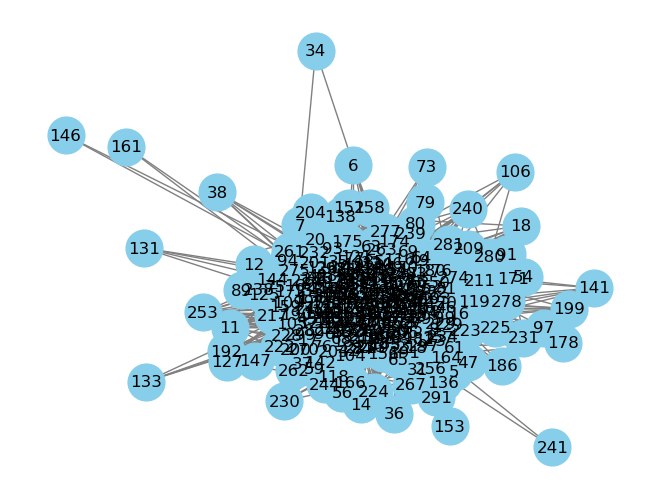

10070
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


In [41]:
# Example usage:
n = 300  # Number of nodes
F = list(range(1, 81)) # Example distribution (could be any distribution fitting your requirements)
G = generate_network(n, F)

#Assign Random Weights to Edges
for (u, v) in G.edges():
    G.edges[u, v]['weight'] = np.random.uniform(0, 1)


nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

print(G.number_of_edges())
print(F)



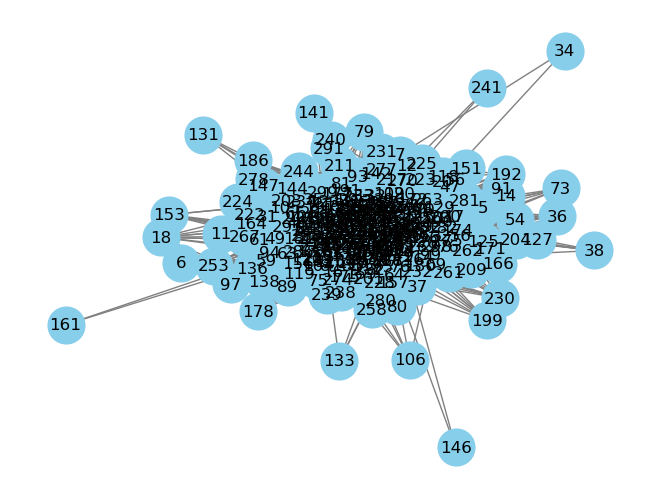

In [42]:
def no_loop_parallel(G):
    G.remove_edges_from(nx.selfloop_edges(G))

    edges_to_remove = []
    for (u, v) in G.edges():
        if G.number_of_edges(u, v) > 1:
            edges_to_remove.extend([(u, v, key) for key in G[u][v]])
    G.remove_edges_from(edges_to_remove)

    return(G)

G = no_loop_parallel(G)

nx.draw(G, with_labels=True, node_color='skyblue', node_size=700, edge_color='gray')
plt.show()

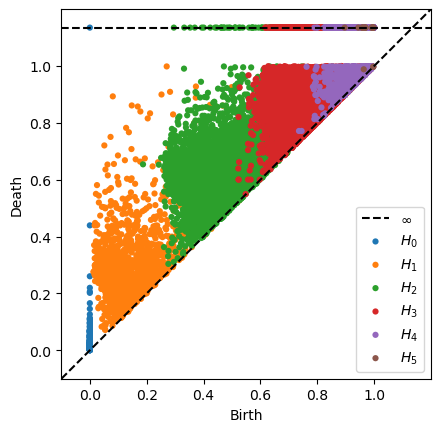

In [43]:
dist_matrix = nx.adjacency_matrix(G, weight='weight')

# Compute the Barcode Using Ripser
diagrams = ripser(dist_matrix, maxdim=5, distance_matrix=True)['dgms']

# Step 5: Plot the Barcode
plot_diagrams(diagrams, show=True)

In [44]:
[len(d) for d in diagrams]

[300, 1529, 5390, 12432, 8786, 21]

In [45]:
F = np.random.normal(loc=0, scale=1)
print(F)

0.34083483315362684


In [46]:
F=list(range(1, 11))
F

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]